<a href="https://colab.research.google.com/github/AayushSaini03/NIDS_project/blob/main/iot_dataset_nids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("azalhowaide/iot-dataset-for-intrusion-detection-systems-ids")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iot-dataset-for-intrusion-detection-systems-ids' dataset.
Path to dataset files: /kaggle/input/iot-dataset-for-intrusion-detection-systems-ids


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [ ]:
botnet_df_v2 = pd.read_csv('/root/.cache/kagglehub/datasets/azalhowaide/iot-dataset-for-intrusion-detection-systems-ids/versions/2/BoTNeTIoT-L01-v2.csv')
botnet_df_no_duplicates = pd.read_csv('/root/.cache/kagglehub/datasets/azalhowaide/iot-dataset-for-intrusion-detection-systems-ids/versions/2/BotNeTIoT-L01_label_NoDuplicates.csv')

In [ ]:
sample_botnet_df_v2 = botnet_df_v2.sample(n=1000, random_state=1)
sample_botnet_df_no_duplicates = botnet_df_no_duplicates.sample(n=1000, random_state=1)

# Save the sampled data
sample_botnet_df_v2.to_csv('sample_botnet_df_v2.csv', index=False)
sample_botnet_df_no_duplicates.to_csv('sample_botnet_df_no_duplicates.csv', index=False)

# botnet_df_v2 features
print('botnet_df_v2 features:')
print(sample_botnet_df_v2.columns)
print('\n')
print('*'*50)

botnet_df_v2 features:
Index(['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
       'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
       'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
       'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
       'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'Device_Name', 'Attack', 'Attack_subType', 'label'],
      dtype='object')


**************************************************


In [ ]:
print('-'*10, 'HEAD', '-'*10)
print(botnet_df_v2.head())
print('\n')

print('-'*10, 'DESCRIBE', '-'*10)
print(botnet_df_v2.describe())
print('\n')

print('-'*10, 'INFO', '-'*10)
print(botnet_df_v2.info())
print('\n')

print('-'*10, 'MISSING VALUES', '-'*10)
print(botnet_df_v2.isnull().sum())
print('\n')

print('-'*10, 'DATA TYPES', '-'*10)
print(botnet_df_v2.dtypes)
print('\n')

# Check for unique values
print('-'*10, 'UNIQUE VALUES', '-'*10)
print(botnet_df_v2.nunique())
print('\n')

---------- HEAD ----------
   MI_dir_L0.1_weight  MI_dir_L0.1_mean  MI_dir_L0.1_variance  H_L0.1_weight  \
0            1.000000         98.000000          0.000000e+00       1.000000   
1            1.931640         98.000000          1.818989e-12       1.931640   
2            2.904273         86.981750          2.311822e+02       2.904273   
3            3.902546         83.655268          2.040614e+02       3.902546   
4            4.902545         81.685828          1.775746e+02       4.902545   

   H_L0.1_mean  H_L0.1_variance  HH_L0.1_weight  HH_L0.1_mean   HH_L0.1_std  \
0    98.000000     0.000000e+00         1.00000          98.0  0.000000e+00   
1    98.000000     1.818989e-12         1.93164          98.0  1.348699e-06   
2    86.981750     2.311822e+02         1.00000          66.0  0.000000e+00   
3    83.655268     2.040614e+02         1.00000          74.0  0.000000e+00   
4    81.685828     1.775746e+02         2.00000          74.0  9.536743e-07   

   HH_L0.1_magnit

---------- UNIQUE VALUES FOR ATTACK AND ATTACK_SUBTYPE ----------
['gafgyt' 'mirai' 'Normal']
['combo' 'junk' 'scan' 'tcp' 'udp' 'ack' 'syn' 'udpplain' 'Normal']


---------- PIE CHART FOR ATTACK AND DEVICE_NAME ----------


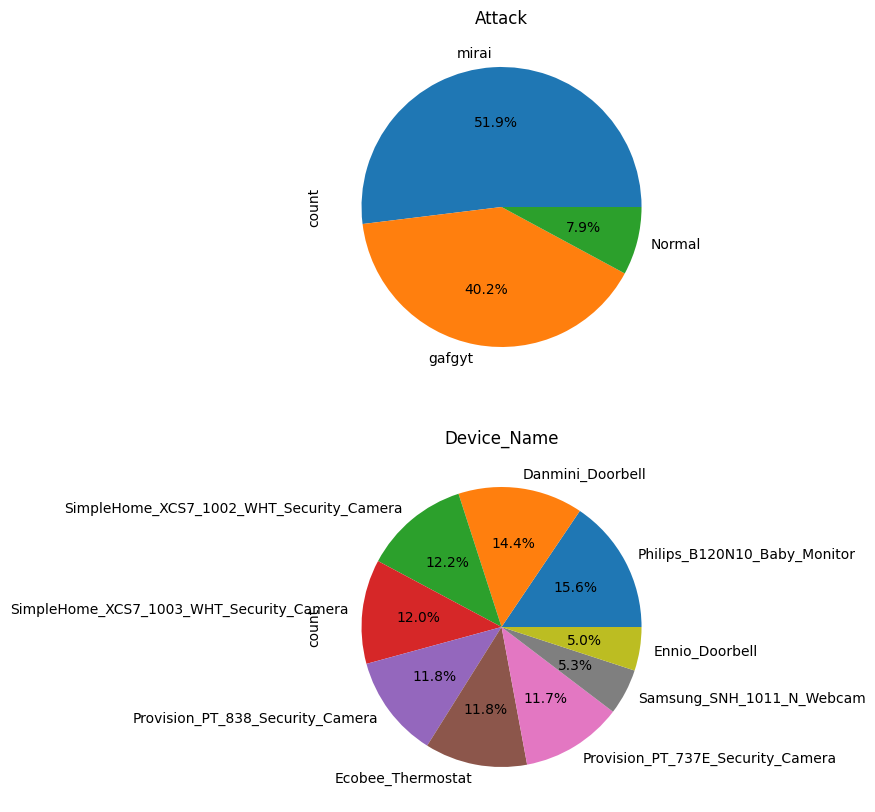

In [ ]:
print('-'*10, 'UNIQUE VALUES FOR ATTACK AND ATTACK_SUBTYPE', '-'*10)
print(botnet_df_v2['Attack'].unique())
print(botnet_df_v2['Attack_subType'].unique())
print('\n')

# Pie chart for attack and device_name
print('-'*10, 'PIE CHART FOR ATTACK AND DEVICE_NAME', '-'*10)
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
botnet_df_v2['Attack'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Attack')
plt.subplot(2, 1, 2)
botnet_df_v2['Device_Name'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Device_Name')
plt.show()


In [ ]:
df = pd.read_csv('sample_botnet_df_v2.csv')
print(df.columns)

Index(['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance',
       'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_weight',
       'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius',
       'HH_L0.1_covariance', 'HH_L0.1_pcc', 'HH_jit_L0.1_weight',
       'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight',
       'HpHp_L0.1_mean', 'HpHp_L0.1_std', 'HpHp_L0.1_magnitude',
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'Device_Name', 'Attack', 'Attack_subType', 'label'],
      dtype='object')


In [ ]:
le = preprocessing.LabelEncoder()
df['Device_Name'] = le.fit_transform(df['Device_Name'])
df['Attack'] = le.fit_transform(df['Attack'])
df['Attack_subType'] = le.fit_transform(df['Attack_subType'])

print('-'*10, 'DATA TYPES', '-'*10)
print(df.dtypes)
print('\n')

print('Device_Name:', df['Device_Name'].unique())
print('Attack:', df['Attack'].unique())
print('Attack_subType:', df['Attack_subType'].unique())

---------- DATA TYPES ----------
MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
Device_Name               int64
Attack                    int64
Attack_subType            int64
label                     int64
dtype: object


Device_Name: [7 5 3 6 4 1 8 0 2]
Attack: [2 1 0]
Attack_subType: [1 6 5 0 4 7 8 2 3]


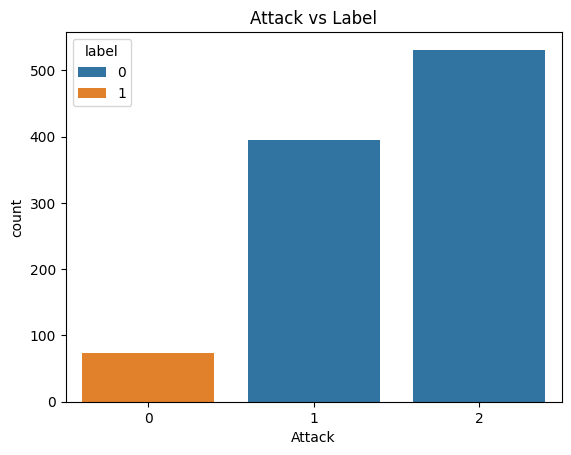

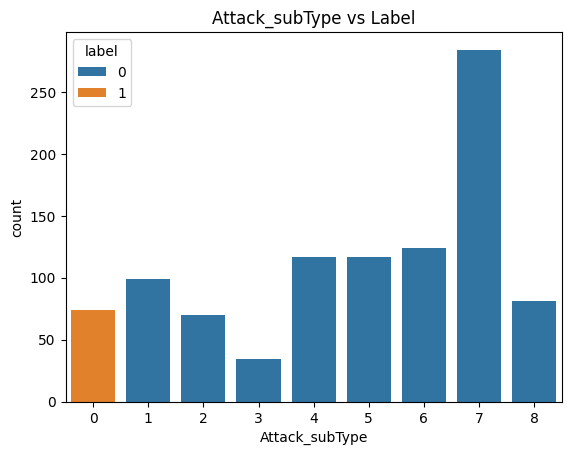

---------- Data Types ----------
MI_dir_L0.1_weight      float64
MI_dir_L0.1_mean        float64
MI_dir_L0.1_variance    float64
H_L0.1_weight           float64
H_L0.1_mean             float64
H_L0.1_variance         float64
HH_L0.1_weight          float64
HH_L0.1_mean            float64
HH_L0.1_std             float64
HH_L0.1_magnitude       float64
HH_L0.1_radius          float64
HH_L0.1_covariance      float64
HH_L0.1_pcc             float64
HH_jit_L0.1_weight      float64
HH_jit_L0.1_mean        float64
HH_jit_L0.1_variance    float64
HpHp_L0.1_weight        float64
HpHp_L0.1_mean          float64
HpHp_L0.1_std           float64
HpHp_L0.1_magnitude     float64
HpHp_L0.1_radius        float64
HpHp_L0.1_covariance    float64
HpHp_L0.1_pcc           float64
Device_Name               int64
label                     int64
dtype: object


In [ ]:
sns.countplot(x='Attack', hue='label', data=df)
plt.title('Attack vs Label')
plt.show()

# Plot 'Attack_subType' vs 'label'
sns.countplot(x='Attack_subType', hue='label', data=df)
plt.title('Attack_subType vs Label')
plt.show()

# Drop attack and attack subtype
df = df.drop(['Attack', 'Attack_subType'], axis=1)

print('-'*10, 'Data Types', '-'*10)
print(df.dtypes)

# Save the data
df.to_csv('BoTNeTIoT-L01-v2-prepared.csv', index=False)

Dropped features: ['MI_dir_L0.1_variance', 'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'HH_L0.1_magnitude', 'HH_L0.1_covariance', 'HH_jit_L0.1_weight', 'HpHp_L0.1_mean', 'HpHp_L0.1_magnitude', 'HpHp_L0.1_radius']
Remaining features: ['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'HH_L0.1_weight', 'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_radius', 'HH_L0.1_pcc', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight', 'HpHp_L0.1_std', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'Device_Name', 'label']


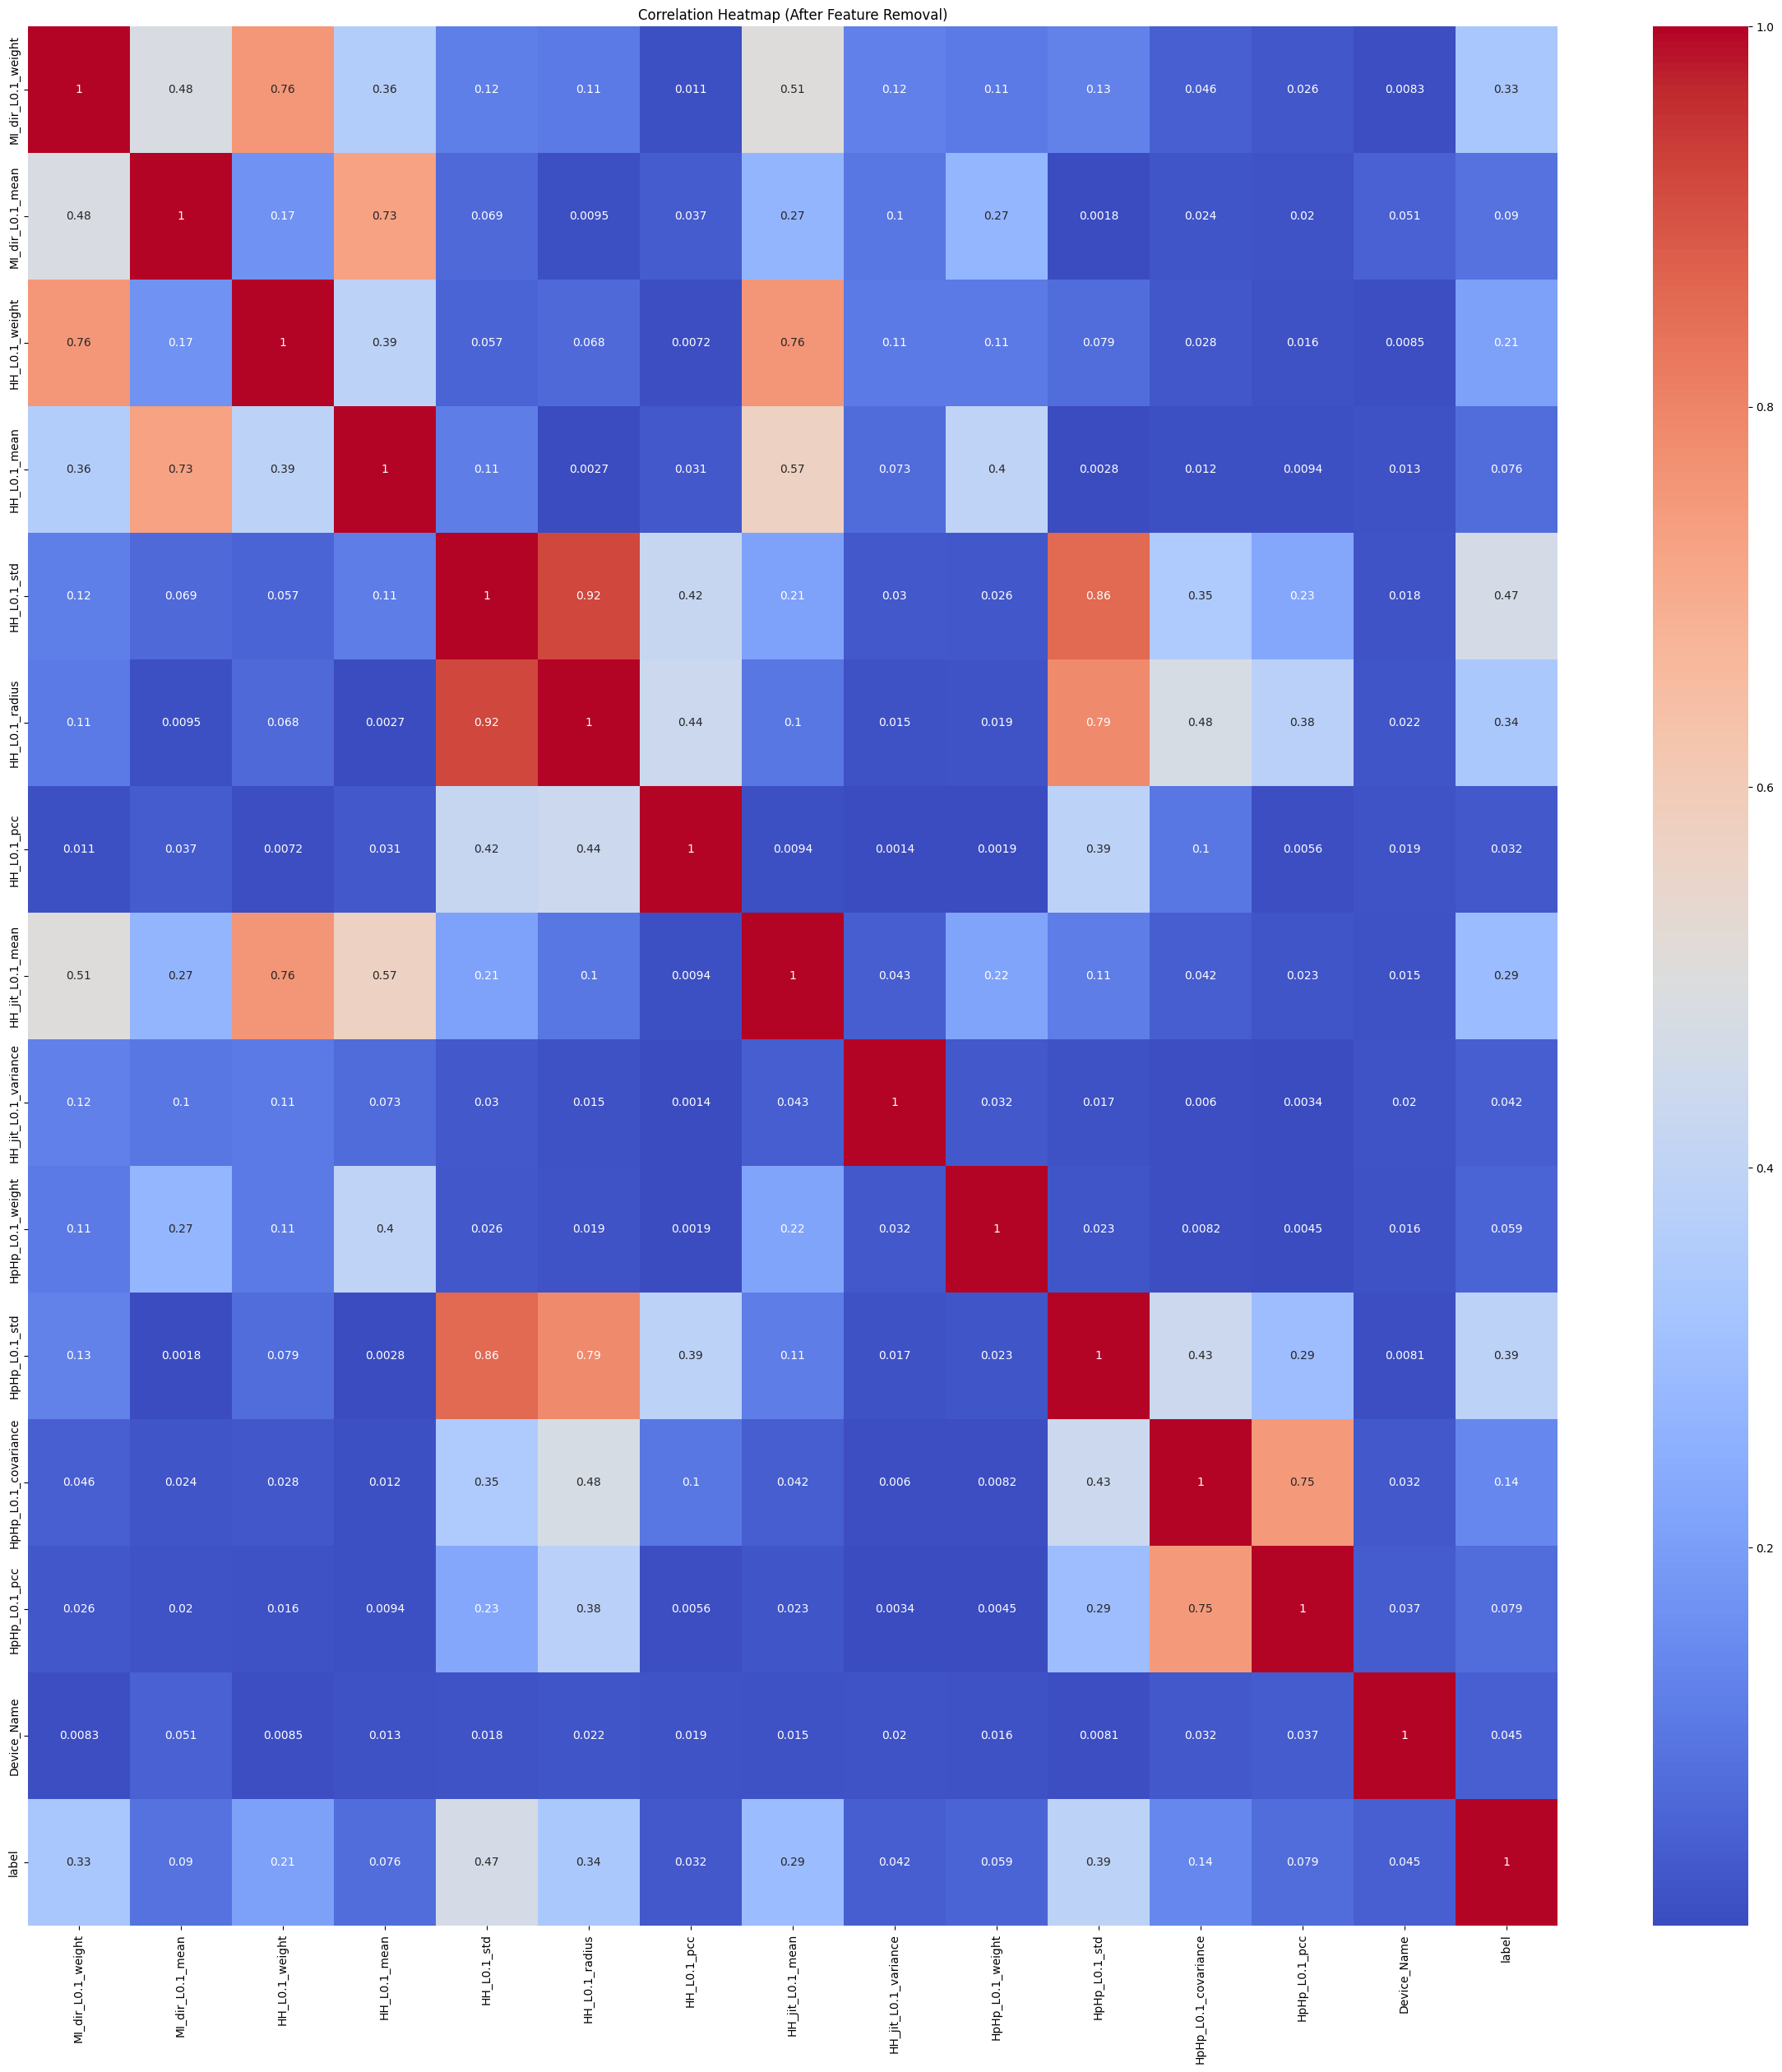

                      MI_dir_L0.1_weight  MI_dir_L0.1_mean  HH_L0.1_weight  \
MI_dir_L0.1_weight              1.000000          0.484517        0.757174   
MI_dir_L0.1_mean                0.484517          1.000000        0.166531   
HH_L0.1_weight                  0.757174          0.166531        1.000000   
HH_L0.1_mean                    0.362314          0.727861        0.388752   
HH_L0.1_std                     0.121368          0.069271        0.057091   
HH_L0.1_radius                  0.110547          0.009478        0.067699   
HH_L0.1_pcc                     0.011326          0.036913        0.007246   
HH_jit_L0.1_mean                0.505763          0.268531        0.759901   
HH_jit_L0.1_variance            0.122534          0.099848        0.110332   
HpHp_L0.1_weight                0.109973          0.270748        0.110418   
HpHp_L0.1_std                   0.128518          0.001847        0.078949   
HpHp_L0.1_covariance            0.046279          0.024248      

In [ ]:
df = pd.read_csv('BoTNeTIoT-L01-v2-prepared.csv')

def drop_highly_correlated_features(df, threshold=0.95):
    df_copy = df.copy()
    corr_matrix = df_copy.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    df_copy.drop(columns=to_drop, inplace=True)
    return df_copy, corr_matrix, to_drop

df, corr, dropped_features = drop_highly_correlated_features(df)

print("Dropped features:", dropped_features)
print("Remaining features:", df.columns.tolist())
corr_after = df.corr().abs()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_after, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap (After Feature Removal)')
plt.show()

# print the correlation matrix
print(corr_after)

In [ ]:
features = df.drop(columns=['label'])
target = df['label']

print('-'*10, 'FEATURES AND TARGET', '-'*10)
print('Features:', features.columns.tolist())
print('Target:', target.name)

---------- FEATURES AND TARGET ----------
Features: ['MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'HH_L0.1_weight', 'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_radius', 'HH_L0.1_pcc', 'HH_jit_L0.1_mean', 'HH_jit_L0.1_variance', 'HpHp_L0.1_weight', 'HpHp_L0.1_std', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'Device_Name']
Target: label


In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0, stratify=target)

# Save the split data
print('-' * 10, 'DATA SPLITS', '-' * 10)
print('Training Features Shape:', X_train.shape)
print('Test Features Shape:', X_test.shape)
print('Training Target Shape:', y_train.shape)
print('Test Target Shape:', y_test.shape)

---------- DATA SPLITS ----------
Training Features Shape: (800, 14)
Test Features Shape: (200, 14)
Training Target Shape: (800,)
Test Target Shape: (200,)


In [ ]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaled data
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_csv('X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled, columns=X_test.columns).to_csv('X_test_scaled.csv', index=False)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
# Read data
X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

X_test_scaled = pd.read_csv('X_test_scaled.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
print('Data loaded')
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test_scaled shape:', X_test_scaled.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

y_train = y_train.values.ravel()

Data loaded
X_train_scaled shape: (800, 14)
X_train shape: (800, 14)
y_train shape: (800, 1)
X_test_scaled shape: (200, 14)
X_test shape: (200, 14)
y_test shape: (200, 1)


Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


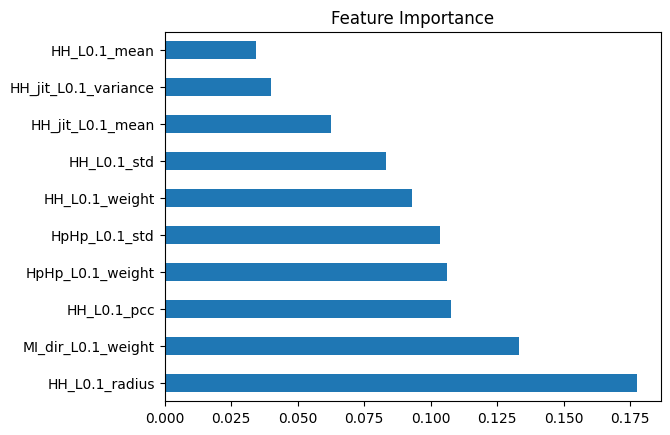

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9974999999999999


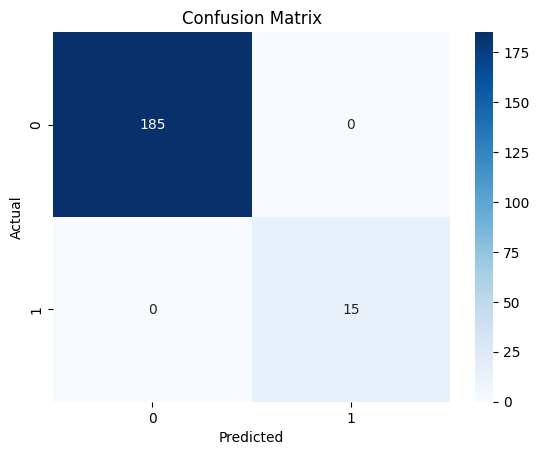

1.0
**********Results**********
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


In [ ]:
def train_random_forest(X_train, y_train, n_estimators=100, top_n_features=10):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, verbose=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
    important_features = feature_importance.nlargest(top_n_features).index

    feature_importance.nlargest(top_n_features).plot(kind='barh', title='Feature Importance')
    plt.show()

    return rf, important_features

def perform_grid_search(X_train, y_train, param_grid):
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    return grid_search.best_estimator_

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
}

rf, important_features = train_random_forest(X_train_scaled, y_train, top_n_features=10)

top_X_train = X_train_scaled[important_features]
top_X_test = X_test_scaled[important_features]

best_model = perform_grid_search(top_X_train, y_train, param_grid)

y_pred = best_model.predict(top_X_test)
y_pred_proba = best_model.predict_proba(top_X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Load the model
filename = 'best_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

# Load the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(top_X_test, y_test)
print(result)

print('*'*10 + 'Results' + '*'*10)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))

NN

In [ ]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(top_X_train, y_train)

# Cross-validation score
print('*' * 10 + ' Cross Validation Score ' + '*' * 10)
print(cross_val_score(mlp, top_X_train, y_train, cv=5, scoring='accuracy').mean())

# Define Hyperparameter Grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['logistic', 'tanh', 'relu'],
}

# Results
print('*' * 10 + ' Results ' + '*' * 10)
print('Accuracy:', round(accuracy_score(y_test, mlp.predict(top_X_test)), 3))
print('Precision:', round(precision_score(y_test, mlp.predict(top_X_test)), 3))
print('Recall:', round(recall_score(y_test, mlp.predict(top_X_test)), 3))
print('F1 Score:', round(f1_score(y_test, mlp.predict(top_X_test)), 3))
print('ROC AUC Score:', round(roc_auc_score(y_test, mlp.predict_proba(top_X_test)[:, 1]), 3))
# Load the model
# Save the trained MLP model
filename = 'mlp_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(top_X_test, y_test)
print(result)

********** Cross Validation Score **********
0.99875
********** Results **********
Accuracy: 0.995
Precision: 0.938
Recall: 1.0
F1 Score: 0.968
ROC AUC Score: 1.0
0.995


CNN

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8326 - loss: 0.5656 - val_accuracy: 0.8938 - val_loss: 0.3443
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9172 - loss: 0.3221 - val_accuracy: 0.8938 - val_loss: 0.2702
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9318 - loss: 0.2069 - val_accuracy: 0.9125 - val_loss: 0.2020
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9616 - loss: 0.1150 - val_accuracy: 0.9187 - val_loss: 0.1324
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9814 - loss: 0.0493 - val_accuracy: 0.9812 - val_loss: 0.0736
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9896 - loss: 0.0427 - val_accuracy: 0.9812 - val_loss: 0.0412
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9973 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 0.0228
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9977 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0173
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Results
Accuracy: 0.995
Precision: 0.9375
Recall: 1.0
F1 Score: 0.967741935483871
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
ROC AUC Score: 1.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


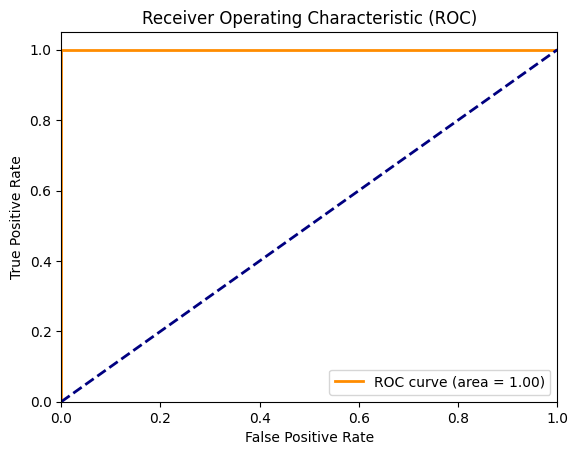

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


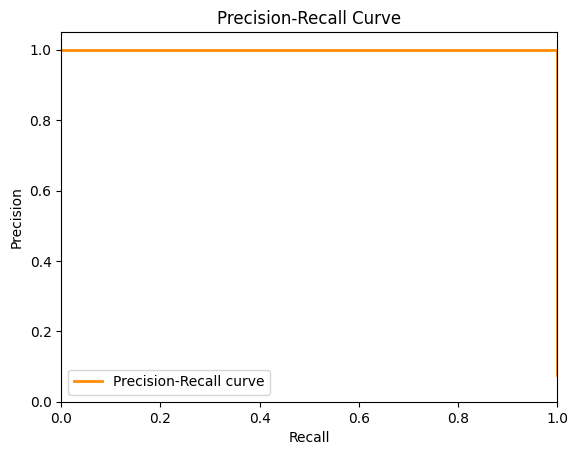

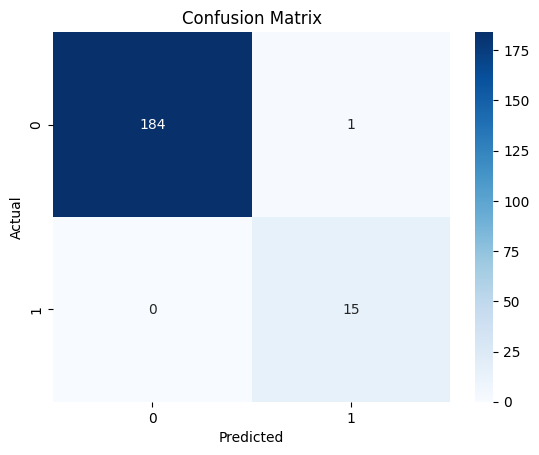

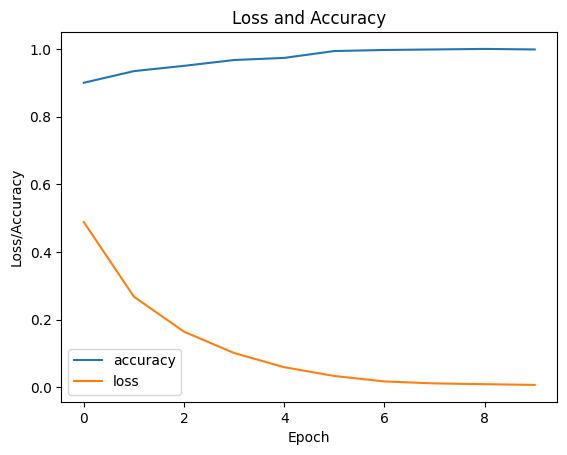

In [ ]:
def build_cnn(input_shape):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for CNN (assuming time series-like data with 1D structure)
top_X_train_cnn = top_X_train.values.reshape((top_X_train.shape[0], top_X_train.shape[1], 1))
top_X_test_cnn = top_X_test.values.reshape((top_X_test.shape[0], top_X_test.shape[1], 1))

# Initialize and train CNN model
cnn_model = build_cnn(input_shape=(top_X_train.shape[1], 1))
history = cnn_model.fit(top_X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Save CNN model
cnn_model.save('cnn_model.h5')

# Results
cnn_predictions = (cnn_model.predict(top_X_test_cnn) > 0.5).astype("int32")
print('Results')
print('Accuracy:', accuracy_score(y_test, cnn_predictions))
print('Precision:', precision_score(y_test, cnn_predictions))
print('Recall:', recall_score(y_test, cnn_predictions))
print('F1 Score:', f1_score(y_test, cnn_predictions))
print('ROC AUC Score:', roc_auc_score(y_test, cnn_model.predict(top_X_test_cnn)))

# Plot Results
fpr, tpr, thresholds = roc_curve(y_test, cnn_model.predict(top_X_test_cnn))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

precision, recall, thresholds = precision_recall_curve(y_test, cnn_model.predict(top_X_test_cnn))

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, cnn_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot loss and accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.title('Loss and Accuracy')
plt.legend()
plt.show()